<a id="back_to_top"></a>
# Market Segmentation and Consumer Behavior
by Carloz Gil

*The Notebook contains links that don't operate on Github. It is recommended to view the project below:*<br>
link

## Table of Contents
- [Introduction](#intro)
- [Elbow Method](#elbow)
- [Deep Learning](#DP)
- [KMeans and Autoencoder](#kencoder)

## Executive Summary
2-3 sentences with key terms

## Introduction
Include goals

## Data Source
We will be using a credit card dataset from Kaggle specifically designed for practicing clustering algorithms. It can be obtained below:

https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/download?datasetVersionNumber=1

It is unclear whether this is a fictional dataset or not. Since the goal of this project is to apply unsupervised algorithms and practice using deep learning techniques to perform market segmentation, this dataset is quite useful. I believe there are benefits to gathering your own data and practicing data cleaning and manipulation. The focus of this project is on different, but I do have a entire project on data collection and manipulation titled **Mergers & Acquisition - Stock Price Prediction**

https://nbviewer.org/github/clozgil/Mergers-Acquisition-Stock-Price-Prediction/blob/main/Mergers%20%26%20Acquisition%20-%20Stock%20Price%20Prediction.ipynb

## Disclaimer
All credit goes to Dr. Ryan Ahmed from McMaster Univesrity in Canada. I've enjoyed his work on using data science to solve business problems. This is my second project following some of the research and exercises he's done. It is merely my interpretation of his instruction

## Goals
- Kmeans
- Deep learning (autoencoder)

Start with 17 features, use autoencoder and deep learning to narrow it down to 10 features. Use principal component analysis to drop down to 2 components

Apply dimensionality reduction

Good to perform market segmentation

## Recap

Import libararies and data, visualize the data and fill up all null, data visuzalization using displot, correlation graph, apply KMean, elbow method, came up with the uptimal num oif clusters using the elbowmethod, apply kmean using on the raw data, we were able to identify 4 different types of customers so that we can launch a target campaign to them, learn about PCA and how we can viz, deep learning with autoencoders to perform dimensionality reduction, 17 features to 10 features, apply Kmeans again with new 10 features to perform clustering, perform PCA and viz again

## Import Libraries and Datasets

Quick exploration on two extreme cases

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [72]:
pd.options.mode.chained_assignment = None

In [73]:
cc_df = pd.read_csv('Marketing_data.csv')
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [74]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Personal Note**

Explore some of the means and maxs of the the df and comment on some observations

**Personal Note**

Explore some of the extremes

**Large one off purchase**
- The extreme with the larget one off purchase (probably a car)
- Make a lot purchases (some large), but avoid cash advance. Perhaps an individual with money and sensitive to interest rate?
- Make 101 purchases
- Min payment is 46000
- Cash advance frequency is 0.08 (very little compare to the guy below)

In [75]:
cc_df[cc_df['ONEOFF_PURCHASES'] == cc_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**Large Cash Advance withdrawl**

- Guy likes cash advance options
- Frequency is a lot
- 123 chas advance transactions

In [76]:
cc_df[cc_df.CASH_ADVANCE == cc_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualize and Explore df

**Missing Values**

<AxesSubplot:>

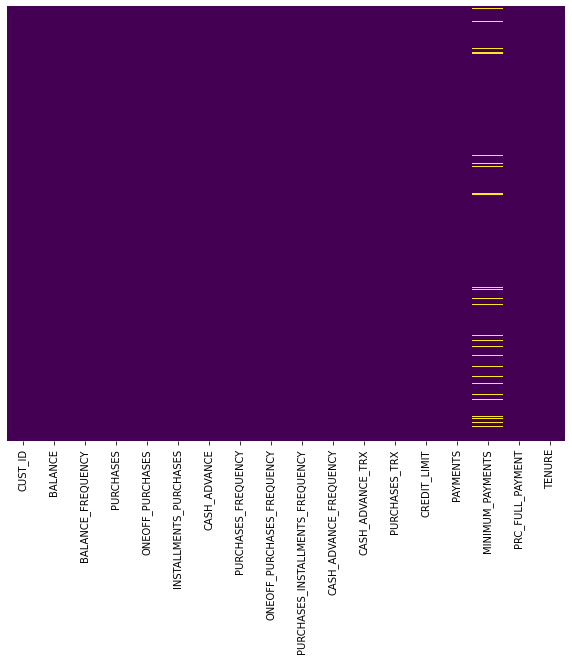

In [77]:
plt.rc('figure', figsize = (10, 8))
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [78]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [79]:
print(round(cc_df.MINIMUM_PAYMENTS.isnull().sum() / cc_df.shape[0] * 100, 4), "%")

3.4972 %


**Fill in Missing Values for Credit Limit**

Since the "CREDIT_LIMIT" is only missing 1 value, we can fill it in with the mean of the entire column.

In [80]:
cc_df.CREDIT_LIMIT.fillna(value = cc_df.CREDIT_LIMIT.mean(), inplace=True)

**Fill in Missing Values for Min Payment**

Since the "MINIMUM_PAYMENTS" is only missing 3.497%, we can fill it in with the mean of the entire column

In [81]:
cc_df.loc[cc_df.MINIMUM_PAYMENTS.isnull() == True, 'MINIMUM_PAYMENTS'] = cc_df.MINIMUM_PAYMENTS.mean()

In [82]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

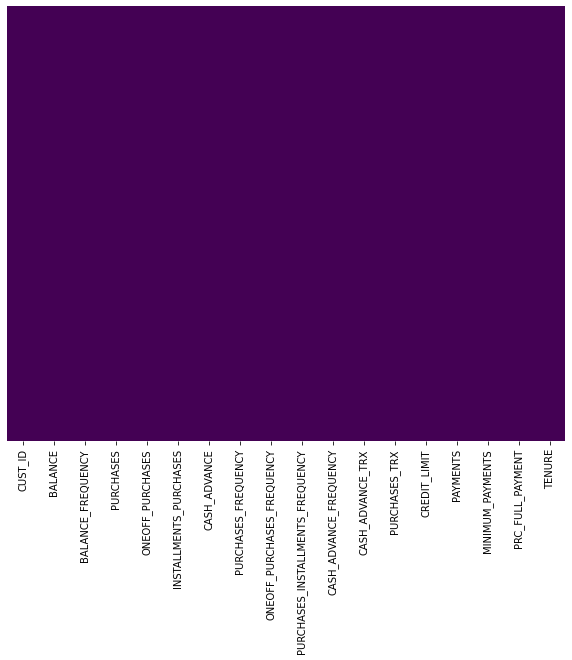

In [83]:
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

**Drop Data**

In [84]:
cc_df.drop('CUST_ID', axis = 1, inplace=True)

In [85]:
cc_df.shape

(8950, 17)

**DISPLOT**

        sns.distplot()

Displot combines matplotlib.hist with seaborn kdeplot()
- kde = kernal density estimate
- kde: used for visualizing the probability density of a continuous variable
    - Demonstrates the probability density at different values in a continuous variable

In [86]:
len(cc_df.columns)

17

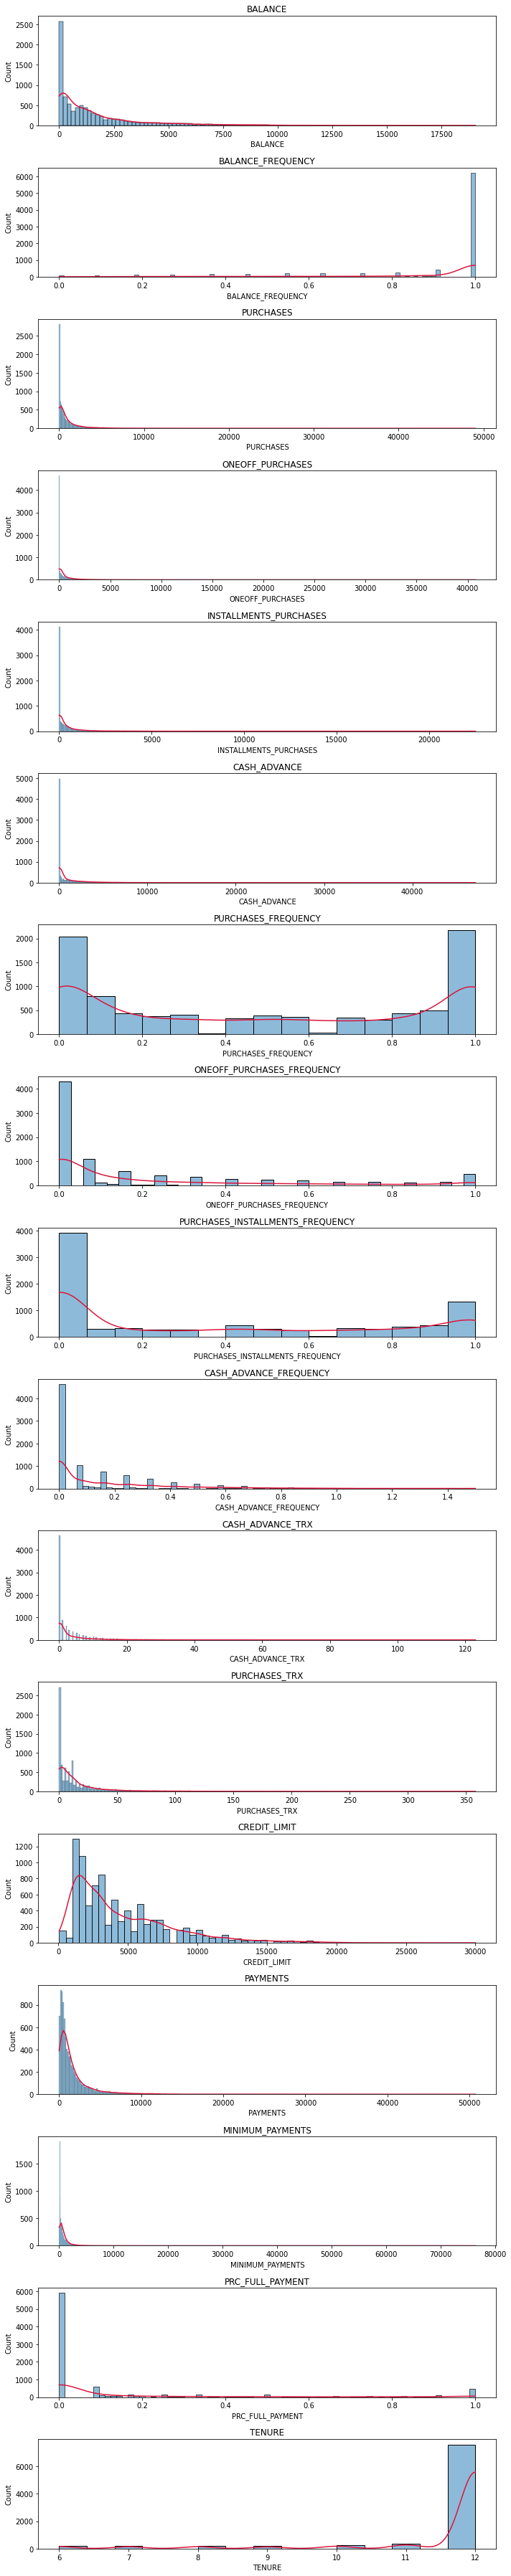

In [87]:
#kde_kws={'color':'b', 'lw':3, 'label':'KDE'}
plt.figure(figsize=(10, 50))
for i in range(17):
    plt.subplot(17, 1, i+1)
    ax = sns.histplot(cc_df[cc_df.columns[i]], kde=True)
    plt.title(cc_df.columns[i])
    ax.lines[0].set_color('crimson')

plt.tight_layout()

Comment on purchase-frequency

Comment on PRC_FULL_PAYMENT

**Correlation**

<AxesSubplot:>

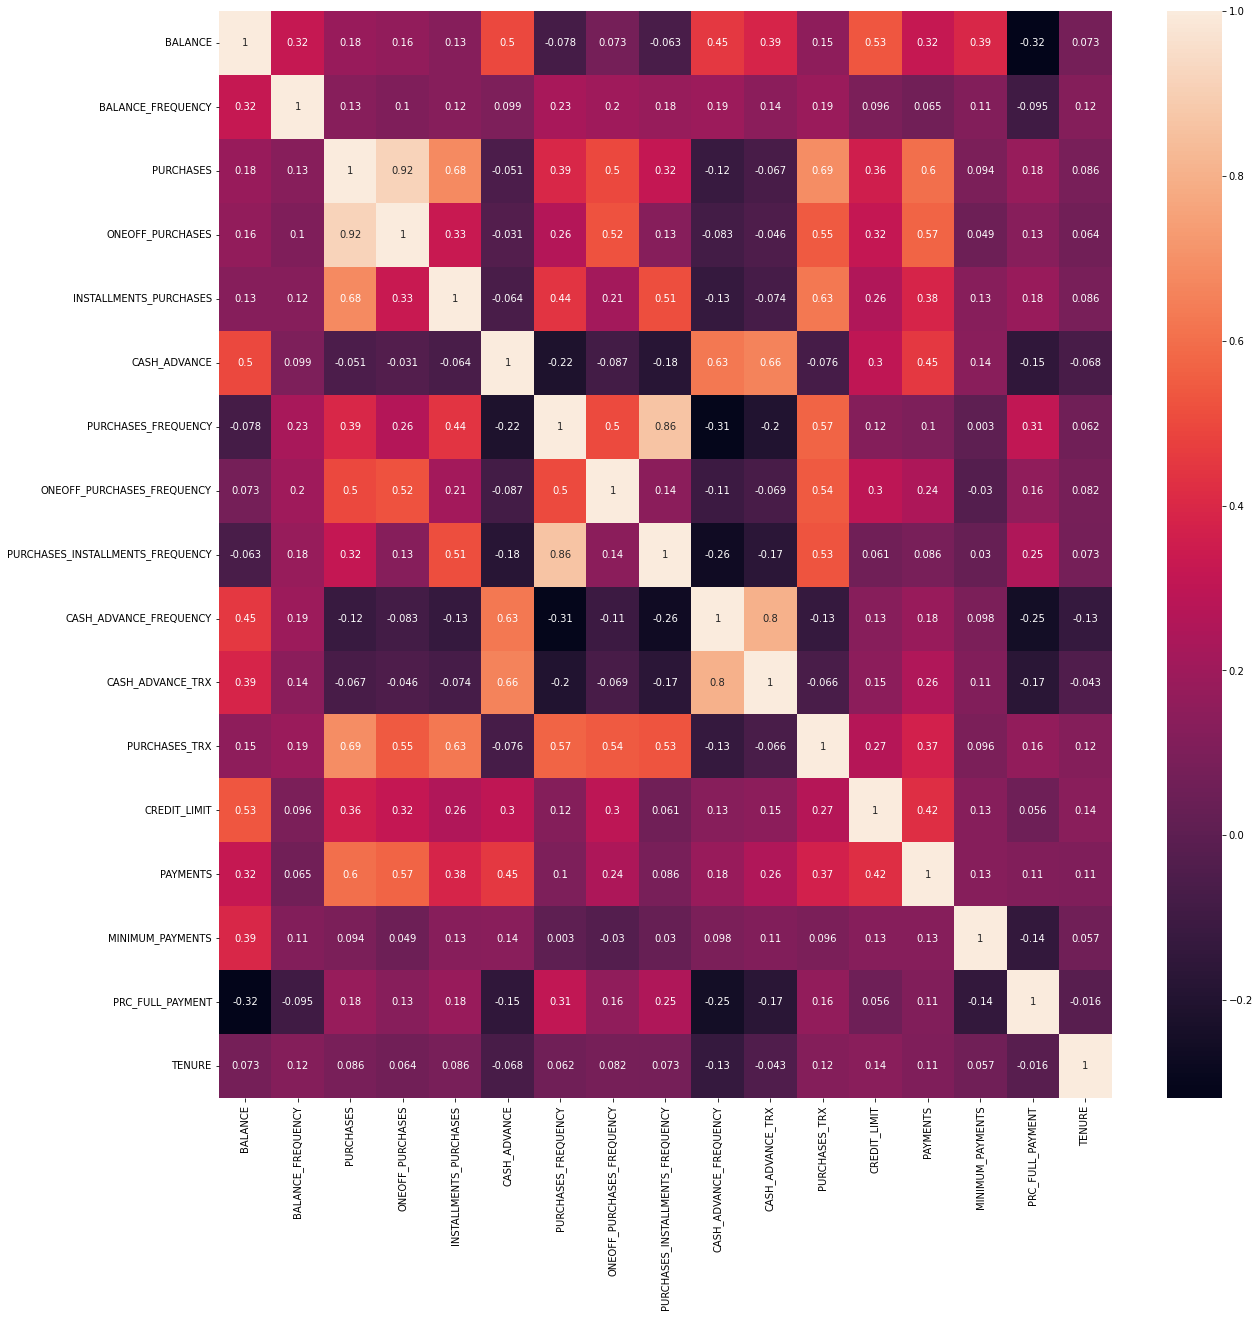

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(cc_df.corr(), annot=True)

[Back to the top](#back_to_top)

<a id="elbow"></a>
## The Elbow Method

Determining the optiminal num of K clusters using the elbow method

**scale the data**

In [89]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cc_df)

In [90]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

**elbow method**

In [91]:
scores = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

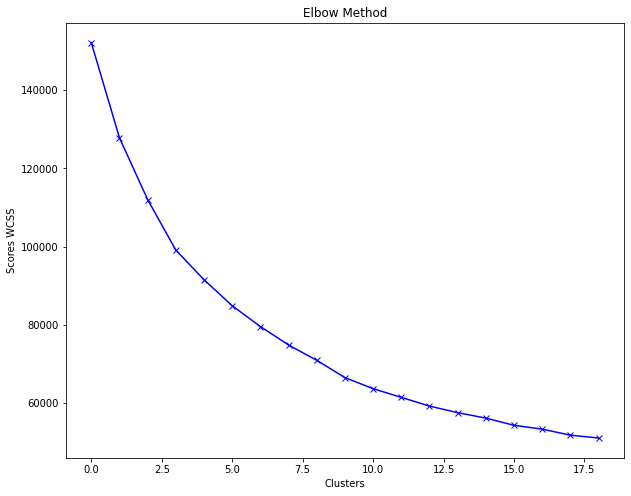

In [92]:
plt.plot(scores, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

we will use K = 8

## Apply KMeans Clustering

Unsupervised

In [93]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [94]:
labels

array([0, 4, 1, ..., 5, 5, 5], dtype=int32)

In [95]:
kmeans.cluster_centers_.shape

(8, 17)

In [96]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008580,0.402831,-0.346553,-0.226572,-0.403050,-0.104748,-0.834146,-0.362546,-0.762215,0.086766,-0.041253,-0.472461,-0.302116,-0.248960,-0.060970,-0.455173,0.272465
1,-0.341883,0.352955,0.030124,-0.091408,0.238987,-0.368766,0.978370,0.196509,0.898579,-0.470443,-0.359600,0.228902,-0.145238,-0.180690,-0.128399,0.333120,0.271268
2,0.502148,0.454886,1.785112,1.541779,1.388293,-0.241758,1.153124,1.809025,0.953295,-0.355310,-0.265335,2.082887,1.112318,0.964989,0.103032,0.489715,0.310794
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,1.631486,0.392618,-0.217834,-0.151981,-0.235915,1.989009,-0.462899,-0.177813,-0.419596,1.921177,1.914522,-0.259955,1.001224,0.805101,0.365940,-0.390545,0.069439
5,-0.343353,-0.329969,-0.280396,-0.206989,-0.282366,0.054415,-0.168696,-0.270088,-0.205723,0.290058,-0.009044,-0.378874,-0.561815,-0.389634,-0.208355,0.023253,-3.178142
6,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491
7,-0.701446,-2.140004,-0.306088,-0.230331,-0.300470,-0.323397,-0.539588,-0.437507,-0.428866,-0.522100,-0.377029,-0.415135,-0.174410,-0.199657,-0.257257,0.287773,0.198590


In order to understand what these numbers mean, let's perform inverse transformation

In [97]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1582.334268,0.972698,262.789099,216.374479,46.594381,759.209775,0.155567,0.094303,0.061514,0.152507,2.967308,2.966219,3395.229447,1012.428843,722.117578,0.020584,11.881947
1,852.874628,0.960882,1067.564966,440.719194,627.180836,205.551380,0.883018,0.261080,0.721556,0.041004,0.794824,20.399475,3966.015557,1210.063345,564.978111,0.251147,11.880345
2,2609.653365,0.985029,4817.123783,3151.474172,1666.484103,471.893097,0.953155,0.742125,0.743301,0.064043,1.438108,66.482615,8541.515994,4526.692093,1104.319254,0.296948,11.933241
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,4960.274729,0.970278,537.798808,340.179243,197.732784,5149.916622,0.304567,0.149413,0.197679,0.519591,16.314031,8.248330,8137.310184,4063.833159,1717.015263,0.039487,11.610245
5,849.813611,0.799104,404.135047,248.878789,155.727956,1092.981833,0.422645,0.121885,0.282678,0.193188,3.187107,5.292453,2450.337185,605.191398,378.643415,0.160516,7.264151
6,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
7,104.473803,0.370324,349.243300,210.135410,139.356466,300.693515,0.273788,0.071941,0.193995,0.030667,0.675879,4.391122,3859.873907,1155.156021,264.679918,0.237883,11.783082


- First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104) and cash advance (303), Percentage of full payment = 23%
- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000) and cash advance (~5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- Third customer cluster (VIP/Prime): high credit limit 16K and highest percentage of full payment, target for increase credit limit and increase spending habits
- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [98]:
labels.shape

(8950,)

In [99]:
print('clusters range from ', labels.min(), 'to ', labels.max())

clusters range from  0 to  7


We will now add a column and assign the cluster associated with that individual.

We will concatinate our original df with the lables

In [100]:
#create a df that includes the clusters
clusters = pd.DataFrame({'clusters':labels})

#concat the new df with our original df
cluster_df = pd.concat([cc_df, clusters], axis = 1)

In [101]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


**Plot histogram of various clusters**

For every cluster, we have a historgram

In the below vizualization, let's look at a few clusters 2 and

**Cluster 3** <br>
The revolvers <br>
- High balance and high cash advance
- Balance frequency is almost all 1
- Frequencies are low, they don't make a lot of purchases
- A lot of cash advance frequency, use cash advance a lot
- A lot of cash advance trx, which is very lucrative

Distinct unique group of customers for the bank to target

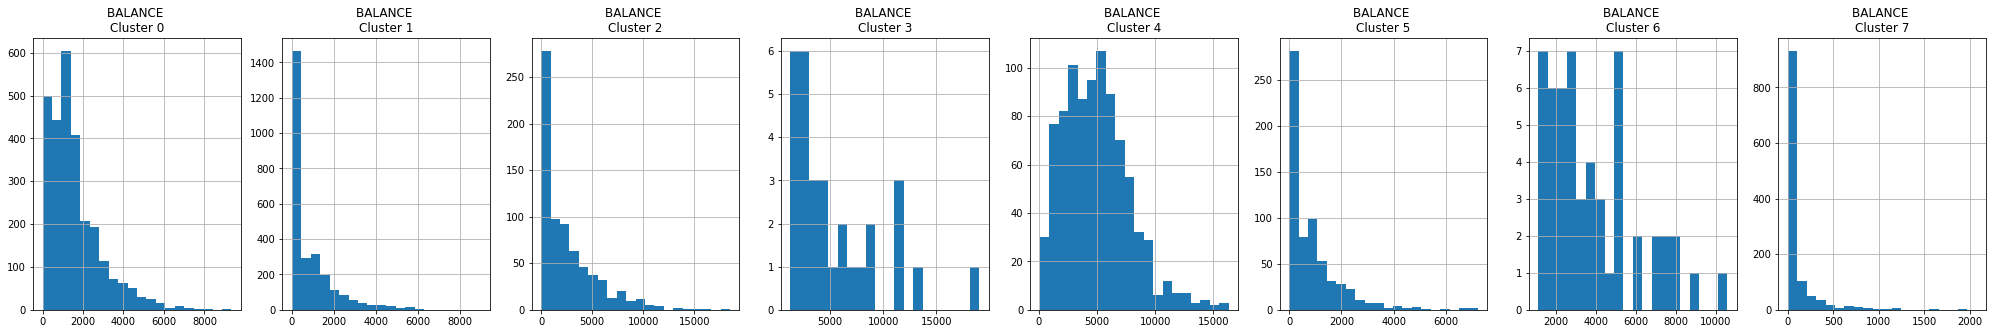

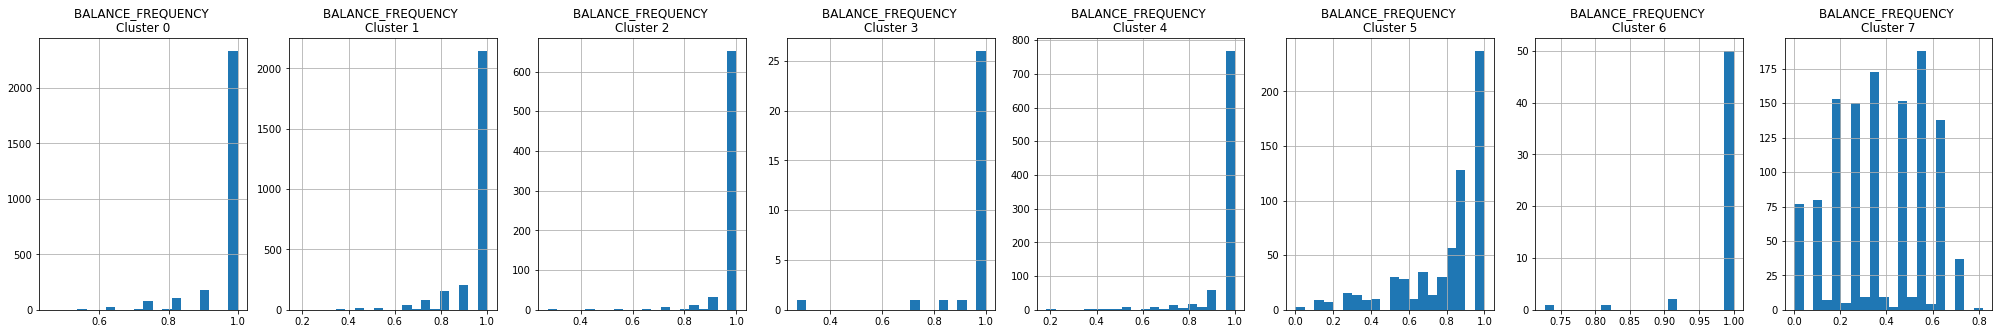

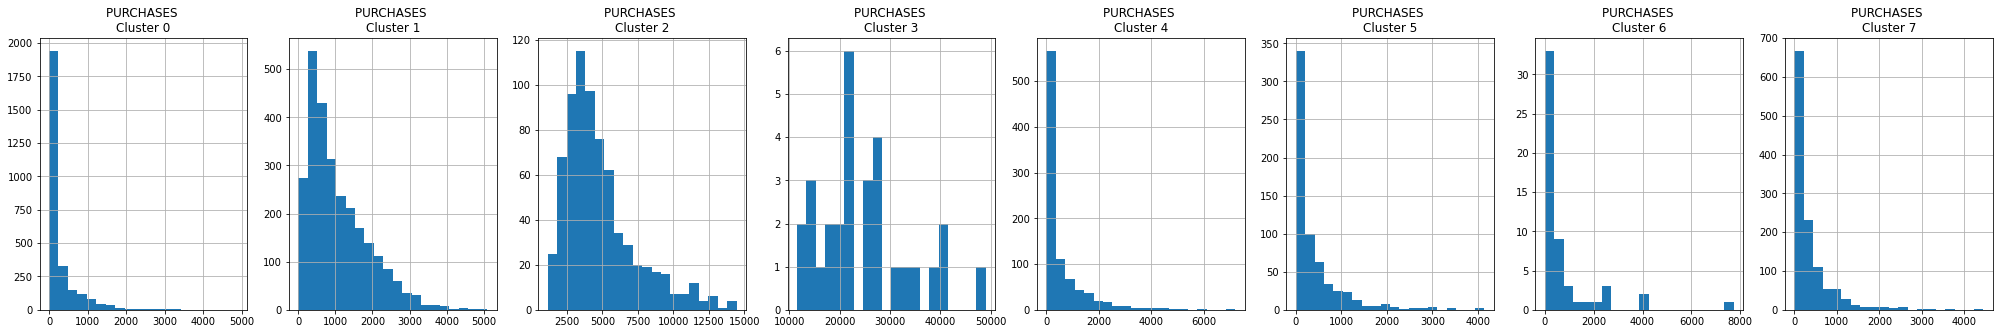

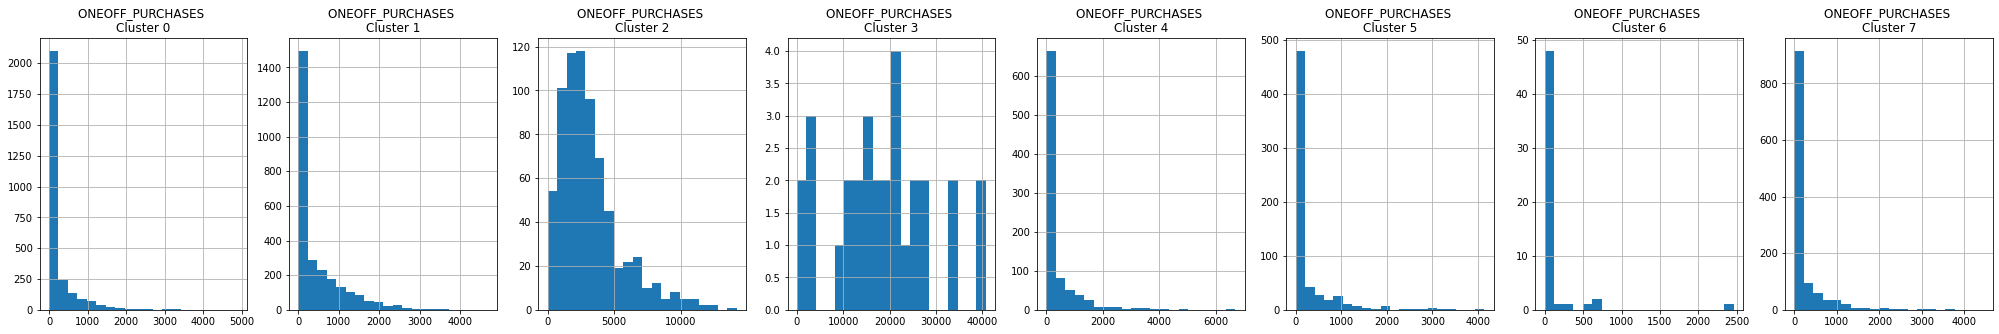

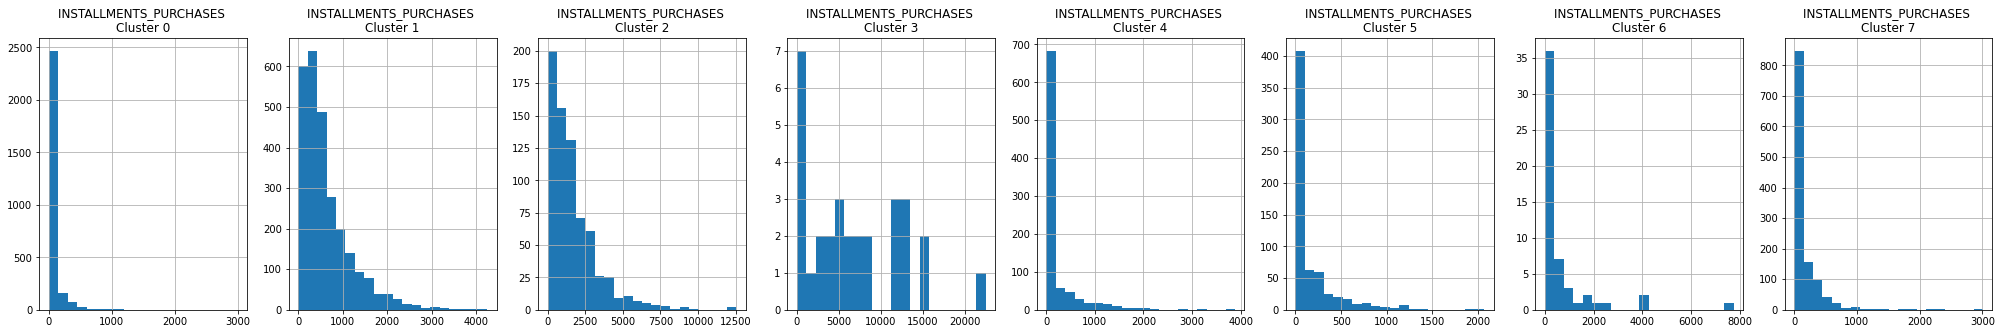

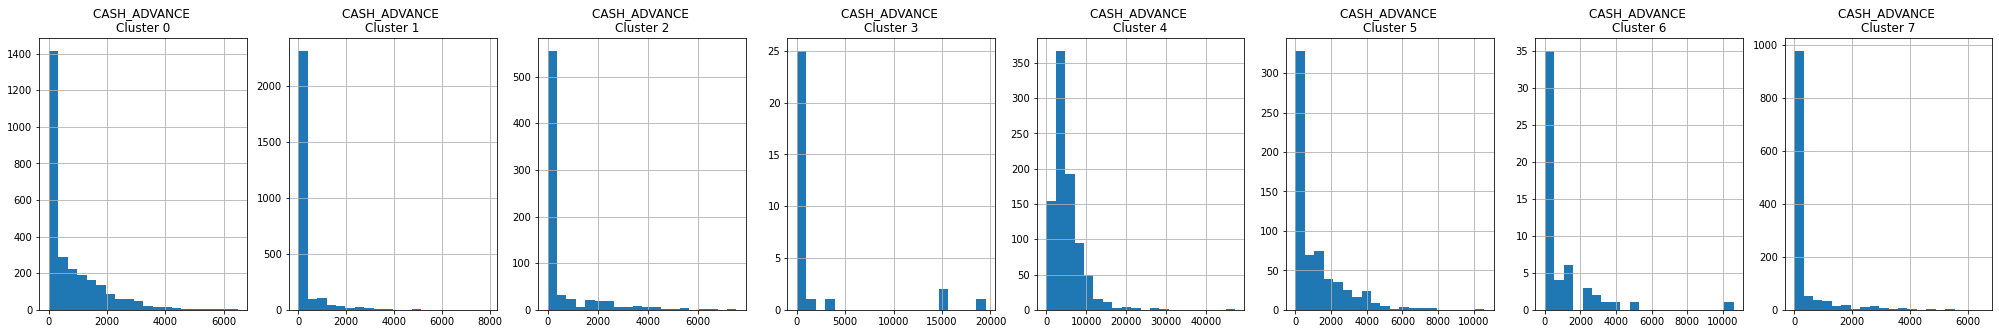

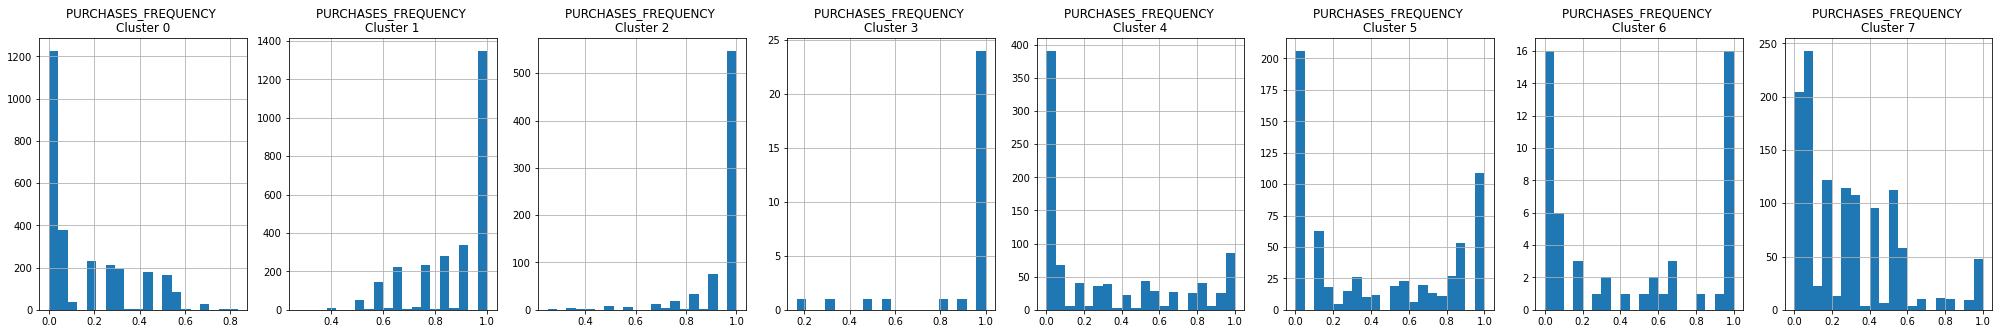

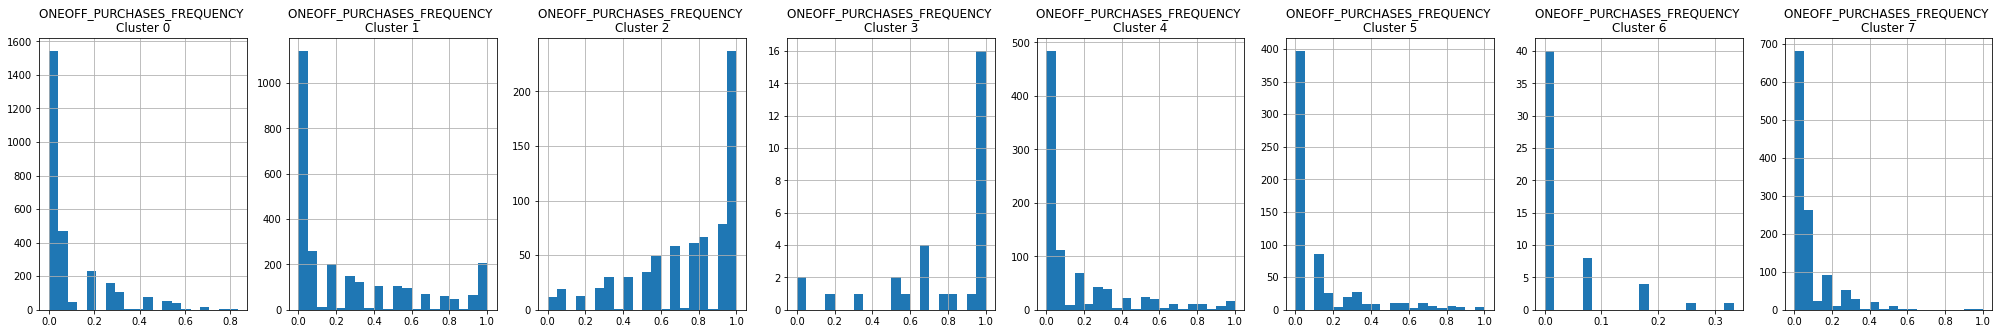

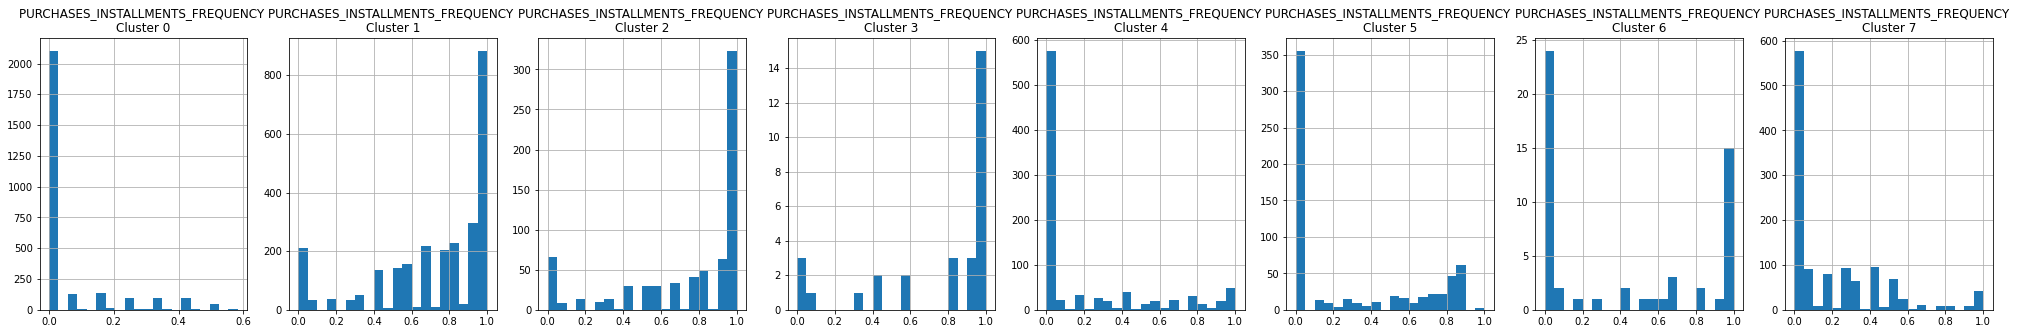

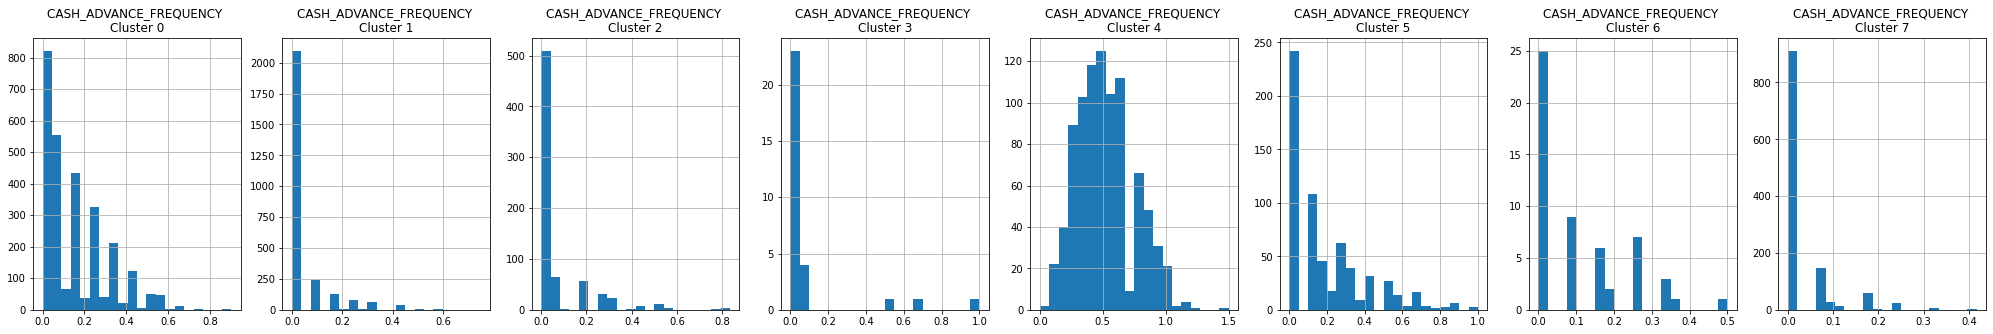

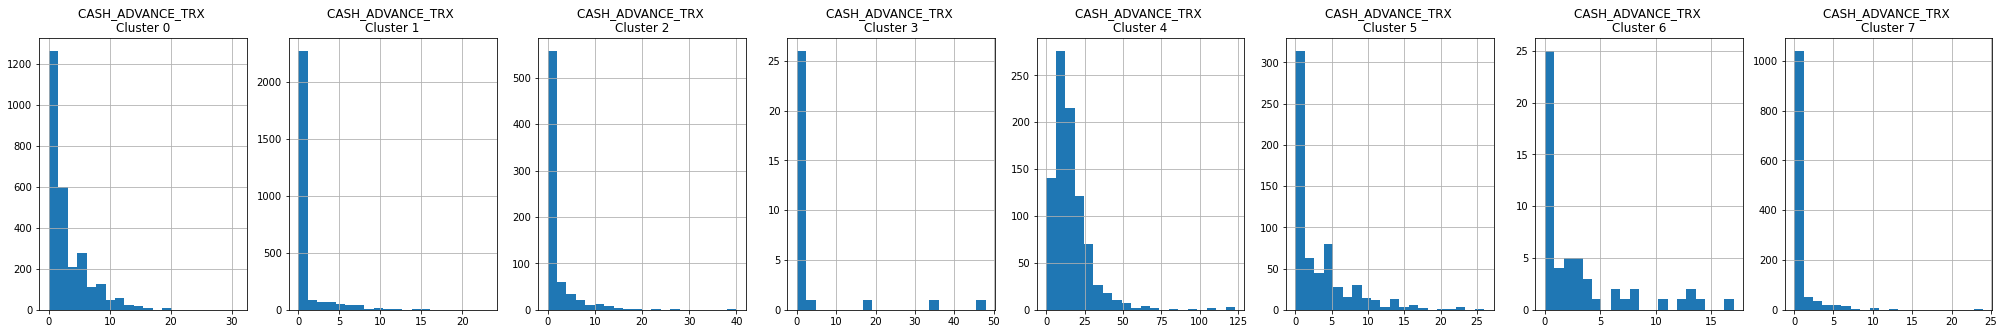

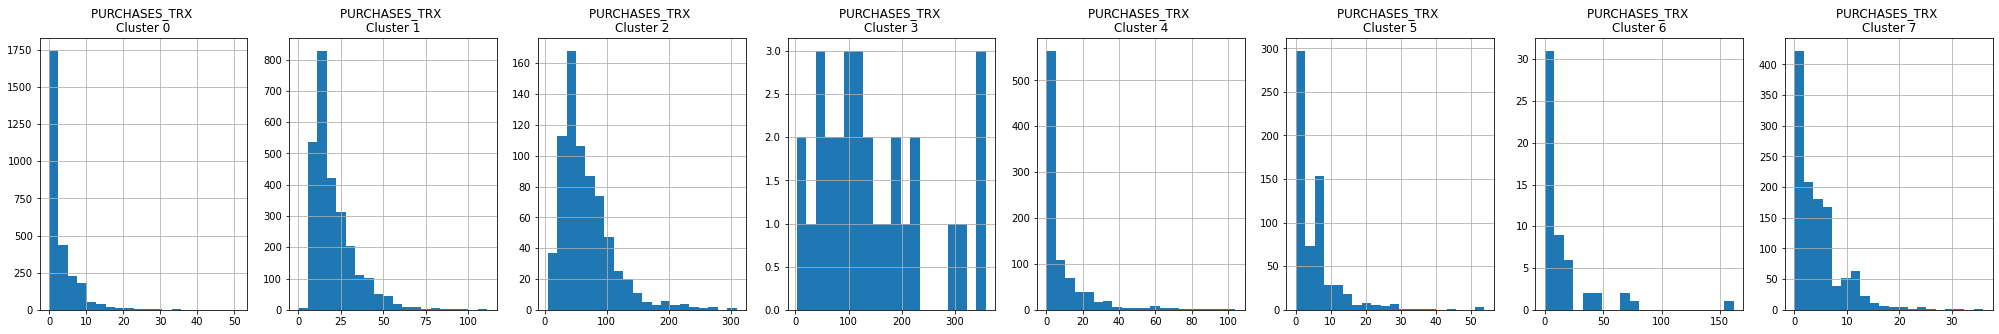

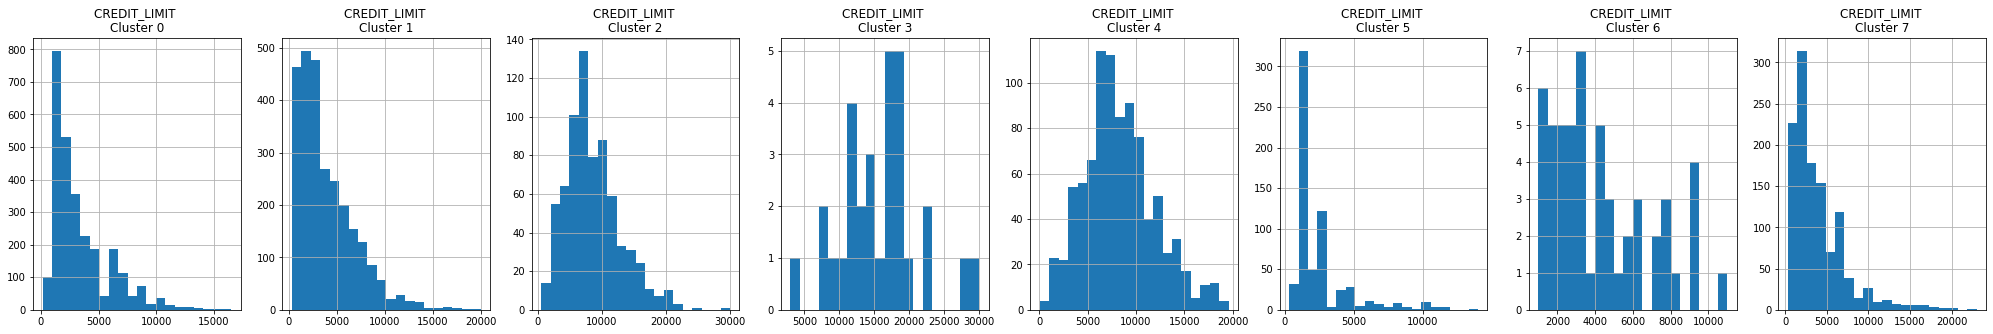

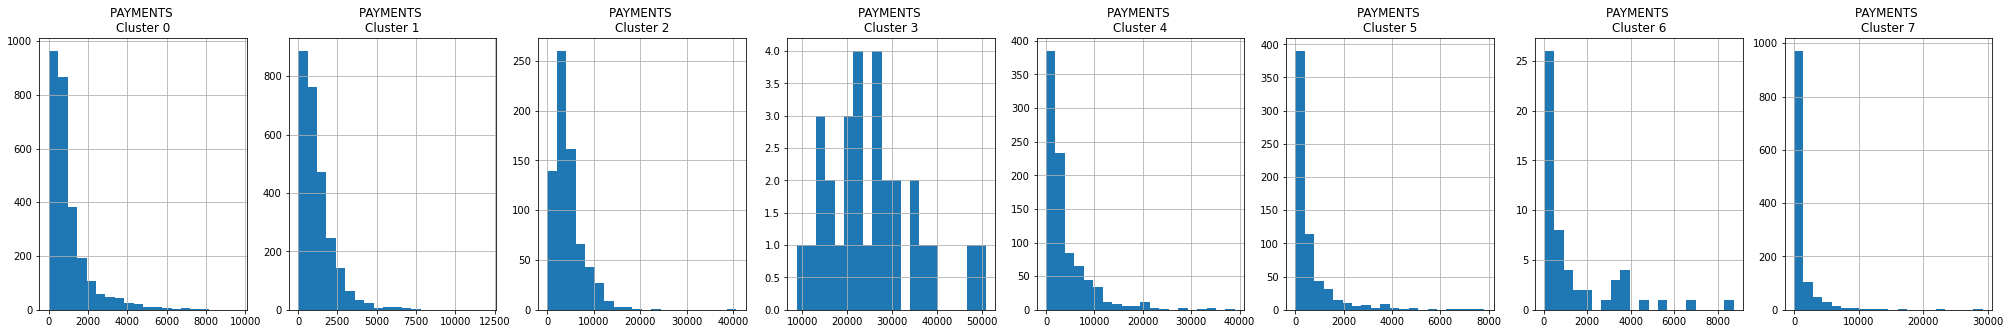

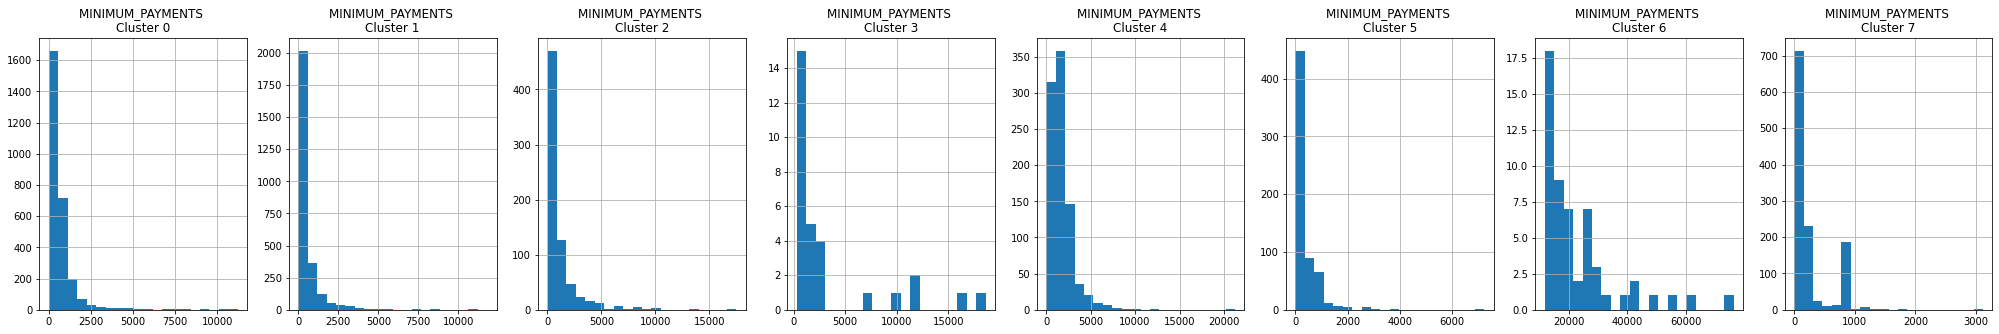

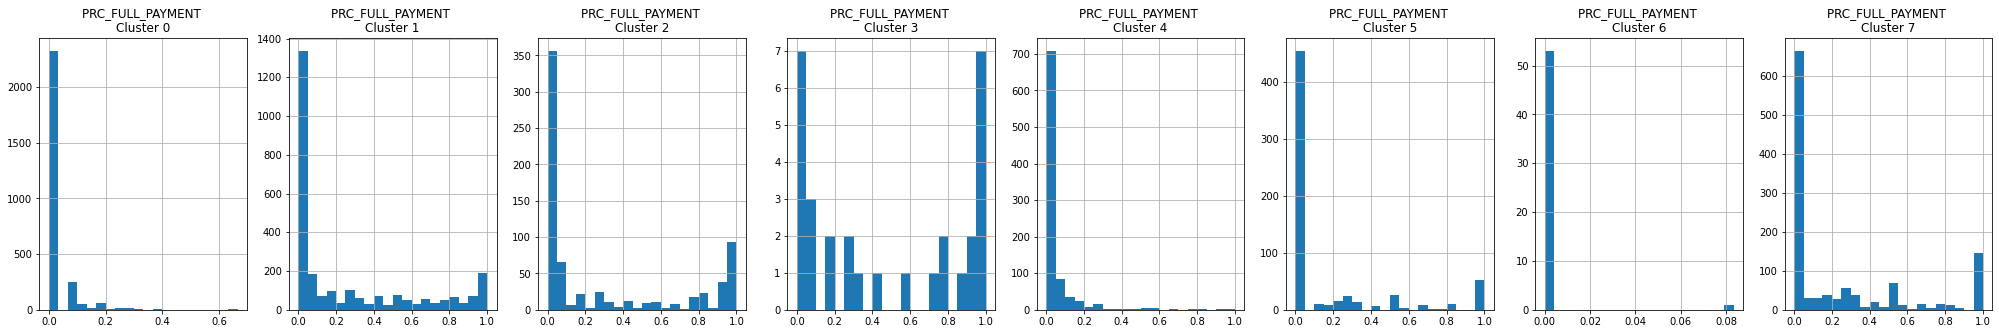

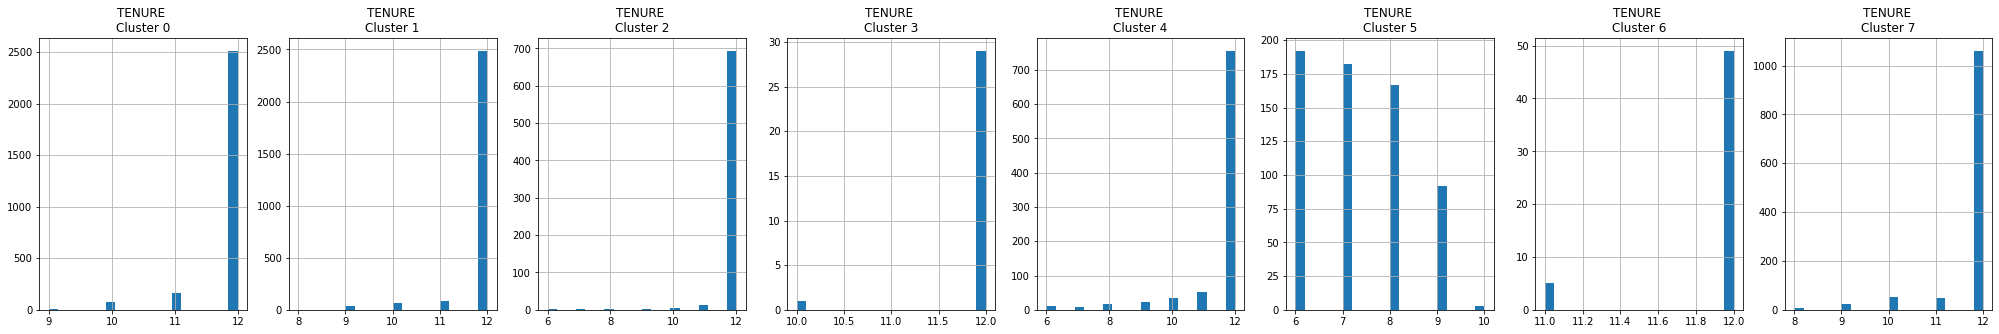

In [102]:
for i in cc_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = cluster_df[cluster_df['clusters'] == j]
        cluster[i].hist(bins = 20)
        plt.title(f'{i} \nCluster {j}')
plt.show()

[Back to the top](#back_to_top)

## Principal Component Analysis (PCA)

**Obtaining the actual PCA**

In [103]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled) #fit the scaled df to the instanciated PCA

**Create a df to visualize**

We'll create a df with with the principal_comp so that we can concat to the original df and visualize

In [104]:
pca_df = pd.DataFrame(principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682213,-1.076429
1,-1.138256,2.506610
2,0.969666,-0.383575
3,-0.873629,0.043162
4,-1.599427,-0.688562


**Concat the pca df to the label cluster**

In [105]:
#Make a df from the lables
labels = pd.DataFrame({'cluster':labels})

#concat
pca_df = pd.concat([pca_df, labels], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682213,-1.076429,0
1,-1.138256,2.506610,4
2,0.969666,-0.383575,1
3,-0.873629,0.043162,0
4,-1.599427,-0.688562,0


**Visualization**

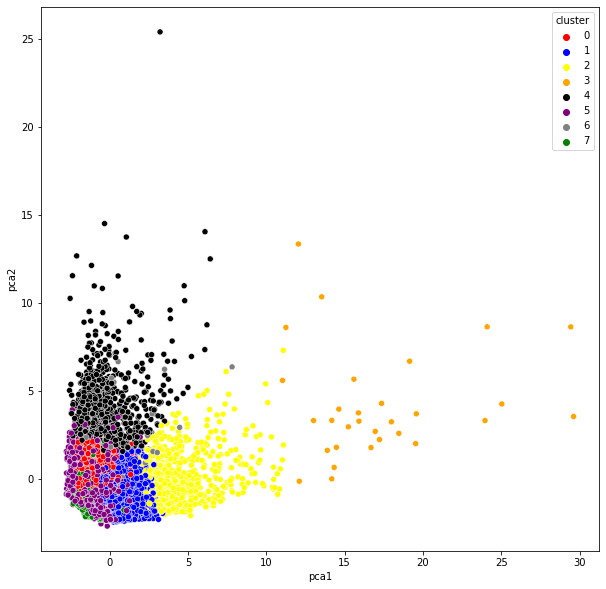

In [106]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = pca_df, x = 'pca1', y = 'pca2', hue = 'cluster', palette = ['red', 'blue', 'yellow', 'orange', 'black', 'purple', 'gray', 'green'])

[Back to the top](#back_to_top)

<a id="DP"></a>
## Deep Learning
### Applying Autoencoders to perform dimensionality reduction

There is some correlation in the data so autoencoders might be appropriate

**Import Libraries**

In [107]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [108]:
# since the df has 17 features
input_df = Input(shape = (17,))

#encoder
#fully connected artificial neural network
x = Dense(7, activation = 'relu')(input_df) #Layer 1
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

#encoded layer
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

#decorder network
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder
encoder = Model(input_df, encoded)

#complie
autoencoder.compile(optimizer='adam', loss = 'mean_squared_error')

In [109]:
df_scaled.shape

(8950, 17)

**Train the model with the scaled data**

Here we train autoencoder to perform dimensionality reduction

In [110]:
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs=25, verbose=1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 5s 526us/sample - loss: 0.5823
Epoch 2/25
8950/8950 [==============================] - 4s 429us/sample - loss: 0.2851
Epoch 3/25
8950/8950 [==============================] - 4s 460us/sample - loss: 0.2126
Epoch 4/25
8950/8950 [==============================] - 4s 410us/sample - loss: 0.1764
Epoch 5/25
8950/8950 [==============================] - 5s 593us/sample - loss: 0.1591
Epoch 6/25
8950/8950 [==============================] - 6s 675us/sample - loss: 0.1523
Epoch 7/25
8950/8950 [==============================] - 5s 561us/sample - loss: 0.1425
Epoch 8/25
8950/8950 [==============================] - 6s 666us/sample - loss: 0.1316
Epoch 9/25
8950/8950 [==============================] - 4s 399us/sample - loss: 0.1144
Epoch 10/25
8950/8950 [==============================] - 3s 378us/sample - loss: 0.1066
Epoch 11/25
8950/8950 [==============================] - 3s 373us/sample - loss: 0.0985
Epoch 12/25
8950/89

We had 2.3 million parameters!

In [111]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              2200

[Back to the top](#back_to_top)

<a id="kencoder"></a>
## K Means Algorithm Using Dimensionality Reduction

Take the new features (after pred auto encoder) and apply k means

Find the optimal number of clusters

Apply kmeans

PCA

Visuzalization

In [122]:
pred = encoder.predict(df_scaled)
pred.shape

(8950, 10)

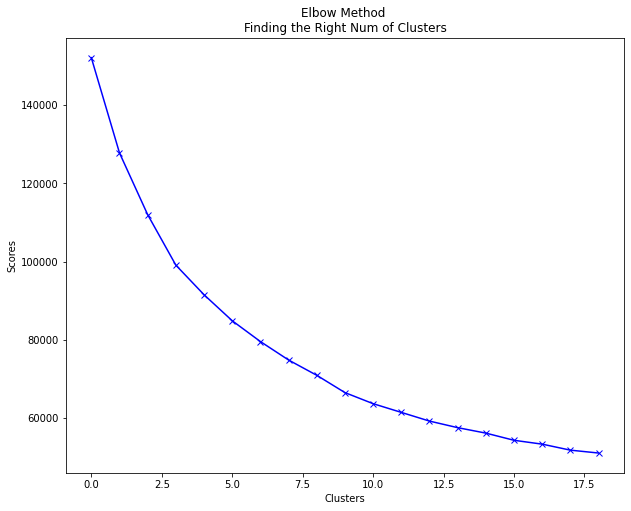

In [123]:
scores_2 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Elbow Method \nFinding the Right Num of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

**Scores 1 v Scores 2**

Kmeans versus Kmean + autoencoder

/Users/carlozgil/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.
/Users/carlozgil/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  


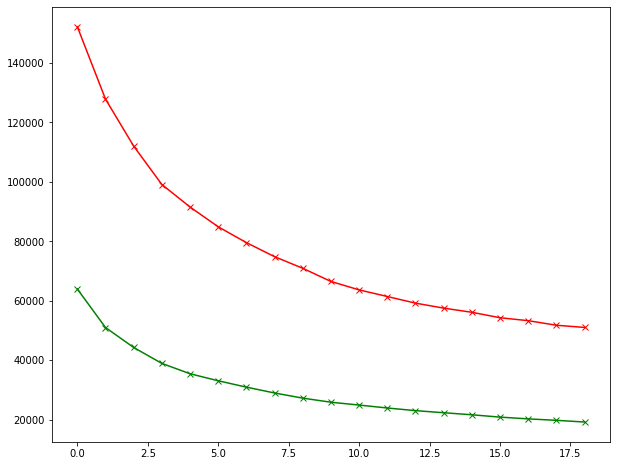

In [124]:
plt.plot(scores, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

We could maybe do 2 or 3 clusters instead of the 8

**KMeans with 4 clusters**

In [125]:
kmeans = KMeans(n_clusters=4)

In [126]:
kmeans.fit(pred)
labels = kmeans.labels_

In [128]:
df_cluster_dr = pd.concat([cc_df, pd.DataFrame({'cluster':lables})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


**Principle Component Analysis**

In [131]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns=['pca1', 'pca2'])

In [132]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':lables})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.577627,-0.277392,0
1,0.422518,1.227631,2
2,-0.629386,-0.308832,0
3,-0.904444,0.219091,0
4,-1.497543,-0.092913,0


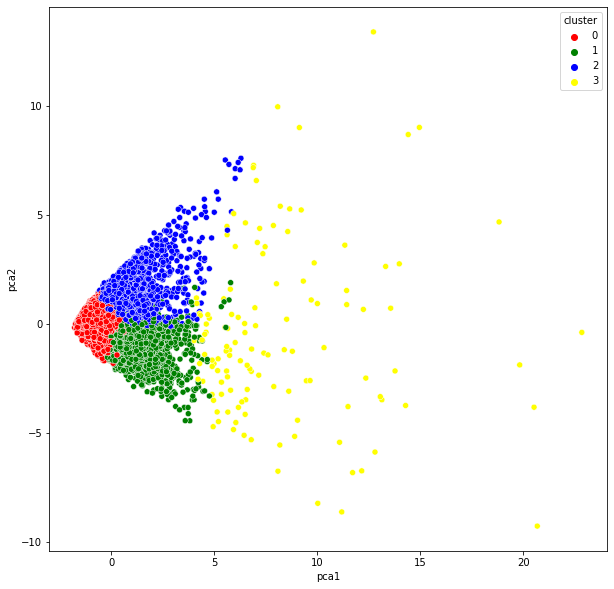

In [133]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = pca_df, x = 'pca1', y = 'pca2', hue = 'cluster', palette = ['red', 'green', 'blue', 'yellow'])

[Back to the top](#back_to_top)